In [2]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

# import prepare function
import prepare

# Wrangle

In [3]:
# Getting data using prepare function
df = prepare.get_data()

In [4]:
df.head()

,year,month,label,all_items_value,all_items_ monthly_change,apparel_value,apparel_monthly_change,energy_value,energy_monthly_change,food_value,food_monthly_change,gas_value,gas_monthly_change,medical_value,medical_monthly_change,transportation_value,transportation_monthly_change
0,1970,01,1957-01-01,27.67,0.1,44.3,0.0,21.3,0.0,28.4,-0.4,NaN,NaN,16.7,0.6,23.5,0.9
1,1970,02,1957-02-01,27.80,0.5,44.3,0.0,21.4,0.5,28.7,1.1,NaN,NaN,16.7,0.0,23.7,0.9
2,1970,03,1957-03-01,27.86,0.2,44.5,0.5,21.5,0.5,28.6,-0.3,NaN,NaN,16.8,0.6,23.7,0.0
3,1970,04,1957-04-01,27.93,0.3,44.4,-0.2,21.6,0.5,28.6,0.0,NaN,NaN,16.9,0.6,23.8,0.4
4,1970,05,1957-05-01,28.00,0.3,44.5,0.2,21.6,0.0,28.7,0.3,NaN,NaN,16.9,0.0,23.9,0.4


In [5]:
# Check the shape of data
df.shape

(787, 17)

In [7]:
# Setting label as index
df = df.set_index('label')

# Split Data

1. We will use the training proportion method to split.    
2. Identify the total length of the dataframe and multiply by `train_prop` to get the number of rows that equates to the first x% of the dataframe, which equates to the first x% of the time covered in the data.   (`x = train_prop * 100`)  
3. Select row indices from 0 up to the index representing x-percentile for train, and from the index representing x-percentile through the end of the dataframe for test. In both of these, we will reset the index in order to return dataframes sorted by datetime.  
4. Return train and test dataframes.  

In [9]:
# set train size to be 50% of total 
train_size = int(round(df.shape[0] * 0.5))
train_size

394

In [10]:
# set validate size to be 30% of total 
validate_size = int(round(df.shape[0] * 0.3))
validate_size

236

In [11]:
# set test size to be number of rows remaining. 
test_size = int(round(df.shape[0] * 0.2))
test_size

157

In [12]:
# Varify length
len(df) == train_size + validate_size + test_size

True

In [13]:
# validate will go from 394 to 394+236
validate_end_index = train_size + validate_size
validate_end_index

630

#### Now, use those values to split our dataframe

In [14]:
# train will go from 0 to 394
train = df[:train_size]

In [16]:
# validate will go from 394 to 630
validate = df[train_size:validate_end_index]

In [17]:
# Checking if tail of train match with validate head
train.tail()

,year,month,all_items_value,all_items_ monthly_change,apparel_value,apparel_monthly_change,energy_value,energy_monthly_change,food_value,food_monthly_change,gas_value,gas_monthly_change,medical_value,medical_monthly_change,transportation_value,transportation_monthly_change
label,,,,,,,,,,,,,,,,
1989-06-01,1970,06,124.1,0.3,118.7,-0.2,96.9,-0.5,125.1,0.3,94.0,-1.9,148.1,0.7,136.0,0.5
1989-07-01,1970,07,124.5,0.3,118.3,-0.3,96.7,-0.2,125.6,0.4,93.2,-0.9,149.2,0.7,136.1,0.1
1989-08-01,1970,08,124.5,0.0,117.1,-1.0,94.9,-1.9,125.9,0.2,89.1,-4.4,150.3,0.7,136.6,0.4
1989-09-01,1970,09,124.8,0.2,118.7,1.4,93.8,-1.2,126.3,0.3,87.0,-2.4,151.4,0.7,137.0,0.3
1989-10-01,1970,10,125.4,0.5,119.6,0.8,94.4,0.6,126.8,0.4,87.8,0.9,152.4,0.7,137.6,0.4


In [18]:
validate.head()

,year,month,all_items_value,all_items_ monthly_change,apparel_value,apparel_monthly_change,energy_value,energy_monthly_change,food_value,food_monthly_change,gas_value,gas_monthly_change,medical_value,medical_monthly_change,transportation_value,transportation_monthly_change
label,,,,,,,,,,,,,,,,
1989-11-01,1970,11,125.9,0.4,120.0,0.3,93.9,-0.5,127.4,0.5,86.1,-1.9,153.7,0.9,137.6,0.0
1989-12-01,1970,12,126.3,0.3,119.8,-0.2,94.2,0.3,127.8,0.3,86.0,-0.1,154.6,0.6,138.1,0.4
1990-01-01,1970,01,127.5,1.0,119.9,0.1,98.9,5.0,129.7,1.5,92.9,8.0,155.7,0.7,139.2,0.8
1990-02-01,1970,02,128.0,0.4,122.0,1.8,98.2,-0.7,130.8,0.8,93.0,0.1,156.7,0.6,140.1,0.6
1990-03-01,1970,03,128.6,0.5,123.8,1.5,97.6,-0.6,131.0,0.2,92.3,-0.8,158.0,0.8,141.1,0.7


In [19]:
# Checking if tail of validate match with test head
validate.tail()

,year,month,all_items_value,all_items_ monthly_change,apparel_value,apparel_monthly_change,energy_value,energy_monthly_change,food_value,food_monthly_change,gas_value,gas_monthly_change,medical_value,medical_monthly_change,transportation_value,transportation_monthly_change
label,,,,,,,,,,,,,,,,
2009-02-01,1970,02,212.705,0.4,119.888,1.6,183.721,2.8,218.949,-0.1,174.067,8.2,392.266,0.2,248.703,0.4
2009-03-01,1970,03,212.495,-0.1,120.368,0.4,178.415,-2.9,218.510,-0.2,166.814,-4.2,393.285,0.3,248.454,-0.1
2009-04-01,1970,04,212.709,0.1,120.182,-0.2,177.552,-0.5,218.175,-0.2,168.312,0.9,394.700,0.4,249.081,0.3
2009-05-01,1970,05,213.022,0.1,120.038,-0.1,179.830,1.3,217.813,-0.2,177.057,5.2,395.999,0.3,248.895,-0.1
2009-06-01,1970,06,214.790,0.8,120.276,0.2,197.033,9.6,217.813,0.0,213.086,20.3,396.799,0.2,248.503,-0.2


In [20]:
# test will include 631 to the end
test = df[validate_end_index:]

In [21]:
test.head()

,year,month,all_items_value,all_items_ monthly_change,apparel_value,apparel_monthly_change,energy_value,energy_monthly_change,food_value,food_monthly_change,gas_value,gas_monthly_change,medical_value,medical_monthly_change,transportation_value,transportation_monthly_change
label,,,,,,,,,,,,,,,,
2009-07-01,1970,07,214.726,0.0,119.984,-0.2,195.778,-0.6,217.387,-0.2,211.649,-0.7,398.036,0.3,250.113,0.6
2009-08-01,1970,08,215.445,0.3,120.236,0.2,201.583,3.0,217.376,0.0,223.781,5.7,398.919,0.2,251.503,0.6
2009-09-01,1970,09,215.861,0.2,120.779,0.5,202.777,0.6,217.258,-0.1,226.214,1.1,399.902,0.2,253.010,0.6
2009-10-01,1970,10,216.509,0.3,120.500,-0.2,204.719,1.0,217.452,0.1,228.651,1.1,400.792,0.2,254.501,0.6
2009-11-01,1970,11,217.234,0.3,120.007,-0.4,210.932,3.0,217.581,0.1,238.246,4.2,402.295,0.4,255.701,0.5


In [22]:
# Checking shape again
train.shape[0], validate.shape[0], test.shape[0]

(394, 236, 157)

<AxesSubplot:xlabel='label', ylabel='all_items_value'>

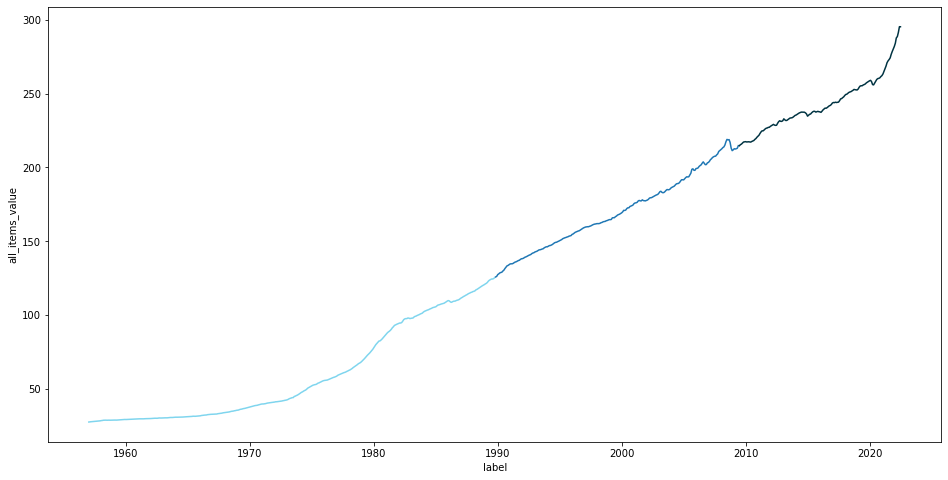

In [31]:
# Visualizing how data is split through time
plt.figure(figsize = (16,8))
sns.lineplot(train.index, train.all_items_value, color = '#7FD5EE')
sns.lineplot(validate.index, validate.all_items_value)
sns.lineplot(test.index, test.all_items_value, color = '#003342')

***

# Exploratory Data Analysis (EDA)

In [32]:
train.head()

,year,month,all_items_value,all_items_ monthly_change,apparel_value,apparel_monthly_change,energy_value,energy_monthly_change,food_value,food_monthly_change,gas_value,gas_monthly_change,medical_value,medical_monthly_change,transportation_value,transportation_monthly_change
label,,,,,,,,,,,,,,,,
1957-01-01,1970,01,27.67,0.1,44.3,0.0,21.3,0.0,28.4,-0.4,NaN,NaN,16.7,0.6,23.5,0.9
1957-02-01,1970,02,27.80,0.5,44.3,0.0,21.4,0.5,28.7,1.1,NaN,NaN,16.7,0.0,23.7,0.9
1957-03-01,1970,03,27.86,0.2,44.5,0.5,21.5,0.5,28.6,-0.3,NaN,NaN,16.8,0.6,23.7,0.0
1957-04-01,1970,04,27.93,0.3,44.4,-0.2,21.6,0.5,28.6,0.0,NaN,NaN,16.9,0.6,23.8,0.4
1957-05-01,1970,05,28.00,0.3,44.5,0.2,21.6,0.0,28.7,0.3,NaN,NaN,16.9,0.0,23.9,0.4


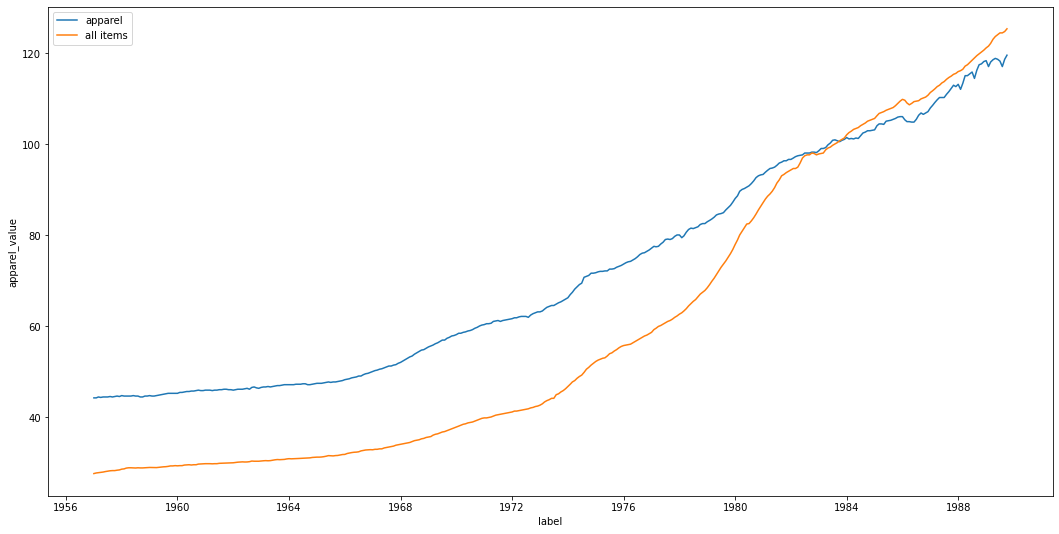

In [42]:
plt.figure(figsize = (18,9))
sns.lineplot(x=train.index, y=train.apparel_value, label ='apparel')
sns.lineplot(x=train.index, y=train.all_items_value, label = 'all items')
plt.legend()